<a href="https://colab.research.google.com/github/mini3713/mini3713/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%2B%EB%94%A5%EB%9F%AC%EB%8B%9D/XGBoost_09_XGBoost_Kaggle_Masters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**9 캐글 마스터에게 배우기**
=================

9.1 특성공학
====================
기존 특성에서 새로운 특성을 만드는 작업을 **특성공학**이라고 한다. 

> ### 우버와 리프트 데이터로 특성공학 실습 

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn. model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/cab_rides.csv', nrows=10000)
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   distance          10000 non-null  float64
 1   cab_type          10000 non-null  object 
 2   time_stamp        10000 non-null  int64  
 3   destination       10000 non-null  object 
 4   source            10000 non-null  object 
 5   price             9227 non-null   float64
 6   surge_multiplier  10000 non-null  float64
 7   id                10000 non-null  object 
 8   product_id        10000 non-null  object 
 9   name              10000 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 781.4+ KB


In [5]:
# 누락된 값이 있는 행 확인
df[df.isna().any(axis=1)]

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
18,1.11,Uber,1543673584211,West End,North End,NaN,1.0,fa5fb705-03a0-4eb9-82d9-7fe80872f754,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
31,2.48,Uber,1543794776318,South Station,Beacon Hill,NaN,1.0,eee70d94-6706-4b95-a8ce-0e34f0fa8f37,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
40,2.94,Uber,1543523885298,Fenway,North Station,NaN,1.0,7f47ff53-7cf2-4a6a-8049-83c90e042593,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
60,1.16,Uber,1544731816318,West End,North End,NaN,1.0,43abdbe4-ab9e-4f39-afdc-31cfa375dc25,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
69,2.67,Uber,1543583283653,Beacon Hill,North End,NaN,1.0,80db1c49-9d51-4575-a4f4-1ec23b4d3e31,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
...,...,...,...,...,...,...,...,...,...,...
9949,1.08,Uber,1543272429665,North End,North Station,NaN,1.0,74fffcba-da67-42d1-b585-13d546a125be,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
9953,2.46,Uber,1545045010035,Beacon Hill,Fenway,NaN,1.0,18c2e91d-d594-4a22-9be7-0a5829efa4bf,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
9965,2.58,Uber,1544815809335,Beacon Hill,South Station,NaN,1.0,77adadfb-4ac7-4cdf-aeab-6c4cfe8f7b26,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
9985,1.89,Uber,1544695512211,Beacon Hill,North End,NaN,1.0,f2dfa974-f9d1-4e90-a0e6-77f7eea16956,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi


In [7]:
# 누락된 행 삭제
df.dropna(inplace=True)

> **타임스탬프 데이터**

In [8]:
# 타임스탬프 열을 Timestamp 객체로 변환
df['date'] = pd.to_datetime(df['time_stamp'])
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223


In [9]:
# 적절한 값으로 날짜변환
df['date'] = pd.to_datetime(df['time_stamp']*(10**6))
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.677
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.198
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223


In [10]:
# date열에서 새로운 열 생성
import datetime as dt
df['month'] = df['date'].dt.month
df['hour'] = df['date'].dt.hour
df['dayofweek'] = df['date'].dt.dayofweek

In [11]:
# 새로운 열을 사용하여 주말인지 아닌지 여부를 나타내는 특성 추가
def weekend(row):
  if row['dayofweek'] in [5,6]:
    return 1
  else:
    return 0

In [12]:
df['weekend'] = df.apply(weekend, axis=1)

> * 건물 용도분류할때 주말인지 아닌지 여부를 나타내는 특성을 추가하면 성능향상에 도움이 되지 않을까? 

In [13]:
# 러시아워인지 아닌지 여부를 나타내는 특성 추가
def rush_hour(row):
  if (row['hour'] in [6,7,8,9,15,16,17,18]) & (row['weekend'] == 0):
    return 1
  else:
    return 0

In [14]:
df['rush_hour'] = df.apply(rush_hour, axis=1)

In [15]:
df.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date,month,hour,dayofweek,weekend,rush_hour
9995,3.05,Uber,1543504379037,Fenway,North Station,11.5,1.0,934d2fbe-f978-4495-9786-da7b4dd21107,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018-11-29 15:12:59.037,11,15,3,0,1
9996,3.05,Uber,1543800477997,Fenway,North Station,26.0,1.0,af8fd57c-fe7c-4584-bd1f-beef1a53ad42,6c84fd89-3f11-4782-9b50-97c468b19529,Black,2018-12-03 01:27:57.997,12,1,0,0,0
9997,3.05,Uber,1543407083241,Fenway,North Station,19.5,1.0,b3c5db97-554b-47bf-908b-3ac880e86103,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-11-28 12:11:23.241,11,12,2,0,0
9998,3.05,Uber,1544896813623,Fenway,North Station,36.5,1.0,fcb35184-9047-43f7-8909-f62a7b17b6cf,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-12-15 18:00:13.623,12,18,5,1,0
9999,2.03,Lyft,1543812781166,Theatre District,Northeastern University,7.0,1.0,7f0e8caf-e057-41eb-bdef-27eb14c88122,lyft_line,Shared,2018-12-03 04:53:01.166,12,4,0,0,0


> **범주형 데이터**
> * 범주형 데이터를 0과 1로 이로어진 희소행렬로 변환하는 OneHotEncoder를 사용
> * 각 범주가 나타난 빈도로 범주형 특성을 변환: 범주형 특성에 있는 각 범주가 백분률로 변환

In [16]:
# 빈도 확인
df['cab_type'].value_counts()

Uber    4654
Lyft    4573
Name: cab_type, dtype: int64

In [17]:
df['cab_freq'] = df.groupby('cab_type')['cab_type'].transform('count')
df['cab_freq'] = df['cab_freq']/len(df)

In [18]:
df.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date,month,hour,dayofweek,weekend,rush_hour,cab_freq
9995,3.05,Uber,1543504379037,Fenway,North Station,11.5,1.0,934d2fbe-f978-4495-9786-da7b4dd21107,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018-11-29 15:12:59.037,11,15,3,0,1,0.504389
9996,3.05,Uber,1543800477997,Fenway,North Station,26.0,1.0,af8fd57c-fe7c-4584-bd1f-beef1a53ad42,6c84fd89-3f11-4782-9b50-97c468b19529,Black,2018-12-03 01:27:57.997,12,1,0,0,0,0.504389
9997,3.05,Uber,1543407083241,Fenway,North Station,19.5,1.0,b3c5db97-554b-47bf-908b-3ac880e86103,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-11-28 12:11:23.241,11,12,2,0,0,0.504389
9998,3.05,Uber,1544896813623,Fenway,North Station,36.5,1.0,fcb35184-9047-43f7-8909-f62a7b17b6cf,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-12-15 18:00:13.623,12,18,5,1,0,0.504389
9999,2.03,Lyft,1543812781166,Theatre District,Northeastern University,7.0,1.0,7f0e8caf-e057-41eb-bdef-27eb14c88122,lyft_line,Shared,2018-12-03 04:53:01.166,12,4,0,0,0,0.495611


> **평균 인코딩**
> * 평균 인코딩(타깃인코딩)은 범주형 특성을 타깃값의 평균을 기반으로 수치특성으로 변환
> * 예로 색을 구별하는 모델에서 7개가 타깃1, 3개가 타깃0이면 평균인코딩 특성은 7/10=0.7이 된다
> * 타깃값을 사용하기 때문에, 타깃이 특성데이터에 직접적으로 영향을 미친다
> * 이는 데이터누수(data leakage)를 유발할 수 있지만, 그럼에도 불구하고 평균 인코딩은 우수한 성능을 내는 것으로 입증되었다 

In [23]:
# 사이킷런과 호환되는 TargetEncoder 클래스로 평균 인코딩 처리
!pip install --upgrade category_encoders
from category_encoders.target_encoder import TargetEncoder
encoder = TargetEncoder()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
df['cab_type_mean'] = encoder.fit_transform(df['cab_type'], df['price'])
df.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date,month,hour,dayofweek,weekend,rush_hour,cab_freq,cab_type_mean
9995,3.05,Uber,1543504379037,Fenway,North Station,11.5,1.0,934d2fbe-f978-4495-9786-da7b4dd21107,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018-11-29 15:12:59.037,11,15,3,0,1,0.504389,15.743446
9996,3.05,Uber,1543800477997,Fenway,North Station,26.0,1.0,af8fd57c-fe7c-4584-bd1f-beef1a53ad42,6c84fd89-3f11-4782-9b50-97c468b19529,Black,2018-12-03 01:27:57.997,12,1,0,0,0,0.504389,15.743446
9997,3.05,Uber,1543407083241,Fenway,North Station,19.5,1.0,b3c5db97-554b-47bf-908b-3ac880e86103,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-11-28 12:11:23.241,11,12,2,0,0,0.504389,15.743446
9998,3.05,Uber,1544896813623,Fenway,North Station,36.5,1.0,fcb35184-9047-43f7-8909-f62a7b17b6cf,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-12-15 18:00:13.623,12,18,5,1,0,0.504389,15.743446
9999,2.03,Lyft,1543812781166,Theatre District,Northeastern University,7.0,1.0,7f0e8caf-e057-41eb-bdef-27eb14c88122,lyft_line,Shared,2018-12-03 04:53:01.166,12,4,0,0,0,0.495611,16.916357


9.2 상관관계가 낮은 앙상블 만들기
====================
정확도를 높이고 과대적합을 막기 위해 상관관계가 낮은 앙상블 실습 

> ### 유방암 데이터셋으로 다양한 모델 생성

In [25]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)
kfold = StratifiedKFold(n_splits=5)

In [28]:
def classification_model(model):
  scores = cross_val_score(model, X, y, cv=kfold)
  return scores.mean()

In [29]:
classification_model(XGBClassifier())

0.9648657040832168

In [31]:
classification_model(XGBClassifier(booster='gblinear'))

0.8910572892408011

In [32]:
classification_model(XGBClassifier(booster='dart', one_drop=True))

0.9613569321533924

In [33]:
classification_model(RandomForestClassifier(random_state=2))

0.9666356155876418

In [36]:
classification_model(LogisticRegression(max_iter=10000))

0.9525694767893184

In [37]:
classification_model(XGBClassifier(n_estimators=500, max_depth=2, learning_rate=0.1))

0.9701133364384411

> ### 상관관계
> * 두 변수 사이의 선형관계의 강도를 나타내는 -1 ~ 1 사이의 통곗값 

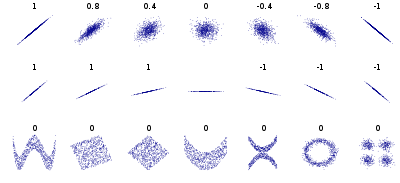

출처 : https://en.wikipedia.org/wiki/Correlation

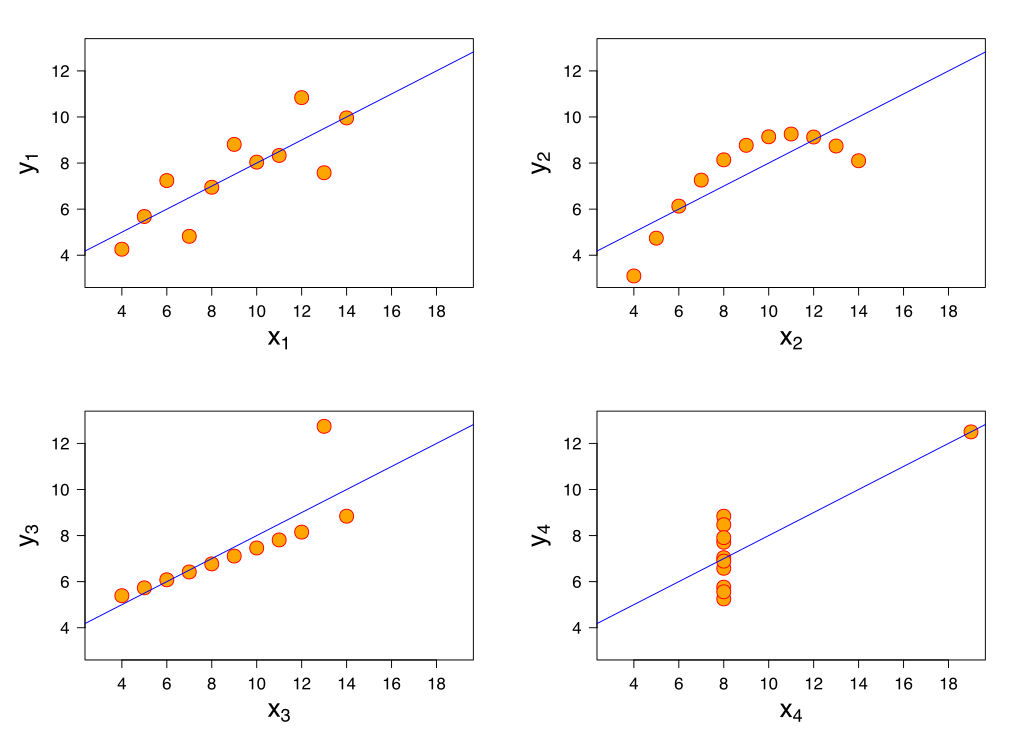

출처 : https://ko.wikipedia.org/wiki/%EC%95%A4%EC%8A%A4%EC%BB%B4_%EC%BD%B0%EB%A5%B4%ED%85%9F

> ### 앙상블의 상관관계 
> * 상관관계가 적은 모델은 다른 예측을 만든다 

In [38]:
 # 상관관계를 계산하기 위해 비교할 데이터는, 머신러닝 모델이 만드는 예측을 사용 
 def y_pred(model):
   model.fit(X_train, y_train)
   y_pred = model.predict(X_test)
   score = accuracy_score(y_pred, y_test)
   print(score)
   return(y_pred)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [40]:
y_pred_gbtree = y_pred(XGBClassifier())

0.958041958041958


In [41]:
y_pred_dart = y_pred(XGBClassifier(booster='dart', one_drop=True))

0.9440559440559441


In [42]:
y_pred_forest = y_pred(RandomForestClassifier(random_state=2))

0.9370629370629371


In [43]:
y_pred_logistic = y_pred(LogisticRegression(max_iter=10000))

0.9370629370629371


In [44]:
y_pred_xgb = y_pred(XGBClassifier(max_depth=2, n_estimators=500, learning_rate=0.1))

0.965034965034965


In [46]:
#  예측 결과를 새로운 데이터프레임으로 연결
df_pred = pd.DataFrame(data = np.c_[y_pred_gbtree, y_pred_dart, y_pred_forest, y_pred_logistic, y_pred_xgb], 
                       columns = ['gbtree', 'dart', 'forest', 'logistic', 'xgb'])

In [47]:
# 상관관계 분석
df_pred.corr()

,gbtree,dart,forest,logistic,xgb
gbtree,1.000000,0.970994,0.927780,0.927777,0.956710
dart,0.970994,1.000000,0.927780,0.927777,0.956710
forest,0.927780,0.927780,1.000000,0.943308,0.913438
logistic,0.927777,0.927777,0.943308,1.000000,0.914111
xgb,0.956710,0.956710,0.913438,0.914111,1.000000


> * 상관관계 값에 대한 명확한 기준은 없다
> * 이 예시에서는 최상의 모델 xgb와 가장 상관관계가 적은 randomforest와 logisticregression을 선택하였다 
> * 이후 사이킷런의 votingclassifier 클래스를 사용해 선택한 모델을 하나로 연결하여 하나의 앙상블 모델을 실습하였다 

> ### VotingClassifier
> * votingclassifier는 여러개의 분류모델을 연결하고 다수결 투표를 사용하여 출력
> * votingregressor는 여러개의 회귀모델을 앙상블하여 각 모델의 예측을 평균화함 

In [48]:
estimators = []

In [49]:
# 첫번째 모델 생성
logistic_model = LogisticRegression(max_iter=10000)

In [50]:
# 모델을 (model_name, model) 형식의 튜플로 리스트에 추가
estimators.append(('logistic', logistic_model))

In [51]:
# 필요한만큼 앞단계를 반복
xgb_model = XGBClassifier(max_depth=2, n_estimators=500, learning_rate=0.1)
estimators.append(('xgb', xgb_model))
rf_model = RandomForestClassifier(random_state=2)
estimators.append(('rf', rf_model))

In [52]:
ensemble = VotingClassifier(estimators)
scores = cross_val_score(ensemble, X, y, cv=kfold)
print(scores.mean())

0.9771619313771154


> ### 스태킹
> * 여러가지 모델들의 예측값을 최종모델의 학습데이터로 사용하는 방법

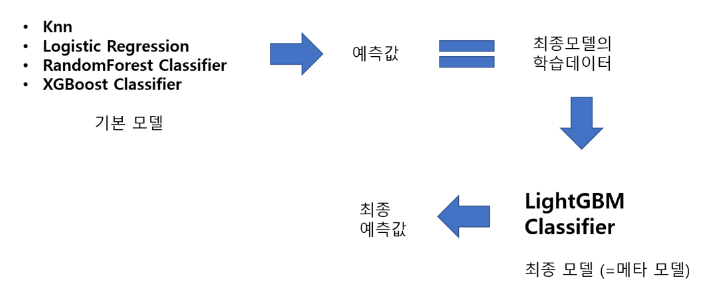

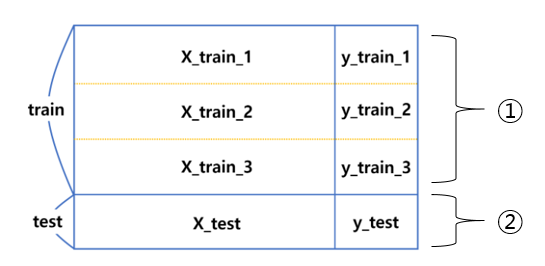

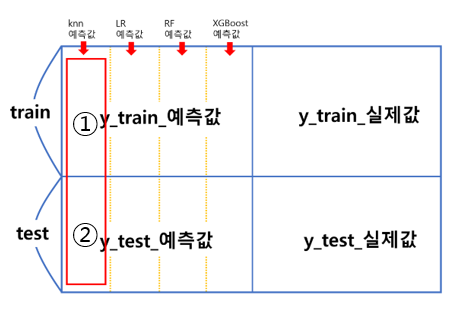

출처 : https://hwi-doc.tistory.com/entry/%EC%8A%A4%ED%83%9C%ED%82%B9Stacking-%EC%99%84%EB%B2%BD-%EC%A0%95%EB%A6%AC

> ### StackingClassifier

In [53]:
# 사이킷런으로 stacking 구현
base_models = []

In [54]:
base_models.append(('lr', LogisticRegression()))
base_models.append(('xgb', XGBClassifier()))
base_models.append(('rf', RandomForestClassifier(random_state=2)))

In [55]:
# 최종학습모델로 회귀에는 선형회귀, 분류에는 로지스틱회귀가 선호됨
meta_model = LogisticRegression()

In [56]:
clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)
scores = cross_val_score(clf, X, y, cv=kfold)
print(scores.mean())

0.9771774569166279
